<a href="https://colab.research.google.com/github/EdwSanA/DPro_Tareas/blob/main/notebooks/Problema_Plegado_de_papel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problema de plegado de papel**
[Problema 1] Implementación utilizando operadores aritméticos de exponenciación
Crea un programa que use el operador aritmético de exponenciación.
Como plantilla, hemos preparado un código que calcula el grosor de una hoja de papel al doblarla una vez. Reescribe el código para calcular el grosor al doblarla 43 veces.

In [1]:
# Grosor inicial del papel en metros
THICKNESS = 0.00008  # 0.00008 m = 0.08 mm

# Cálculo del grosor tras 43 dobleces usando exponenciación
folded_thickness = THICKNESS * (2 ** 43)

# Mostrar el resultado
print("Thickness: {} meters".format(folded_thickness))


Thickness: 703687441.77664 meters


**[Problema 2] Conversión de unidades**
Si la unidad está en metros, es difícil sentir la diferencia, así que convierta la unidad a ◯◯ 10 000 kilómetros y muéstrela.

Hemos preparado un código convertido a ◯◯ kilómetros como ejemplo, así que consúltelo al trabajar en él. Se especifica que se muestran hasta 2 dígitos después del punto decimal.

《código de muestra》

# Convert meters to kilometers and display with two decimal places
print("Thickness: {: .2f} kilometers".format(folded_thickness / 1000))

La distancia a la Luna es de aproximadamente 384.400 km. Comprobemos si el papel doblado llega a la Luna.

In [2]:
# Grosor inicial del papel en metros
THICKNESS = 0.00008

# Cálculo del grosor tras 43 dobleces (en metros)
folded_thickness = THICKNESS * (2 ** 43)

# Conversión:
#   1 kilómetro  = 1 000 metros
#   1 “10 000 km” = 10 000 kilómetros = 10 000 * 1 000 metros
ten_thousand_km = folded_thickness / (10_000 * 1000)

# Mostrar resultado con dos decimales
print("Thickness: {:.2f} (en unidades de 10,000 km)".format(ten_thousand_km))

Thickness: 70.37 (en unidades de 10,000 km)


**[Problema 3] Crear usando una declaración for**
A continuación, cree un programa que utilice la instrucción for.

No utilice operadores aritméticos de exponenciación. Solo se permiten las cuatro operaciones aritméticas +, -, *, )./



In [3]:
# Grosor inicial del papel en metros
THICKNESS = 0.00008

# Empezamos con el grosor original
folded_thickness = THICKNESS

# Doblamos el papel 43 veces, multiplicando por 2 en cada iteración
for i in range(43):
    folded_thickness = folded_thickness * 2

# Mostrar resultado en metros
print("Thickness: {} meters".format(folded_thickness))

# Conversión a kilómetros para una idea más clara (dos decimales)
print("Thickness: {:.2f} kilometers".format(folded_thickness / 1000))


Thickness: 703687441.77664 meters
Thickness: 703687.44 kilometers


[Problema 4] Comparación del tiempo de cálculo
Ambos métodos anteriores son correctos, pero al comparar la bondad del código, por ejemplo, se evalúan los siguientes puntos.

Velocidad de ejecución
Uso de memoria
Legibilidad
Escalabilidad
Reutilización
Esta vez compararé la velocidad de ejecución.

Utilice la plantilla a continuación para generar los tiempos de ejecución de ambos métodos y compararlos. Compare el tiempo en el rango excluyendo las partes utilizadas por cada método, como la definición de variable printy...

"Modelo"

Puedes obtener el tiempo usando timePuedes encontrar el tiempo de ejecución calculando la diferencia de tiempo antes y después del punto que deseas comparar.

import time

start = time.time()
#####
# Paste the code you want to compare here
#####
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

tiempo — Acceso y conversión de datos de tiempo - Documentación de Python

<Desarrollo: Aumentar el número de repeticiones>

Puede ser difícil distinguir la diferencia en una comparación de aproximadamente 43 veces. En tales casos, conviene doblar el papel con más frecuencia para aclarar la diferencia.

<Desarrollo: Uso de comandos mágicos>

Dado que el tiempo de ejecución puede variar ligeramente con cada ejecución, es habitual medirlo varias veces. timeTambién se puede implementar combinando un módulo y una sentencia for. Además, con Jupyter Notebook, %timeitese comando mágico ... Pero sí se puede medir. Los comandos mágicos son funciones específicas de Jupyter Notebook que no están disponibles en el sistema de ejecución estándar de Python.

Comandos mágicos integrados – Documentación de IPython

el%%timeit inicio de la celda donde escribiste el código del cual quieres medir el tiempo de ejecución.

%%timeit
#####
# Paste the code you want to compare here
#####      

In [6]:
import time, math

THICKNESS = 0.00008
FOLDS = 1_000_000

LOG10_2 = math.log10(2)
log10_t0 = math.log10(THICKNESS)

# --- Método 1: directo ---
start = time.time()
log10_t_exp = log10_t0 + FOLDS * LOG10_2
elapsed_exp = time.time() - start

# --- Método 2: bucle ---
start = time.time()
log10_t_for = log10_t0
for _ in range(FOLDS):
    log10_t_for += LOG10_2
elapsed_for = time.time() - start

print(f"Tiempo (log - directo): {elapsed_exp:.6f} s")
print(f"Tiempo (log - bucle)  : {elapsed_for:.6f} s")

# Comparación segura con tolerancia
if math.isclose(log10_t_exp, log10_t_for, rel_tol=1e-6):
    print("Los resultados son prácticamente iguales.")
else:
    print("Hay una diferencia notable.")

# Presentación final
exponent = math.floor(log10_t_exp)
mantissa = 10 ** (log10_t_exp - exponent)
print(f"t ≈ {mantissa:.6f}e{exponent} metros")

Tiempo (log - directo): 0.000043 s
Tiempo (log - bucle)  : 0.075339 s
Los resultados son prácticamente iguales.
t ≈ 7.920525e301025 metros


**[Problema 5] Guardar en una lista**
Hasta ahora, solo hemos utilizado el último valor después de 43 pliegues, pero también necesitamos los valores del proceso para visualizarlos en el gráfico; agregue el código que registra el total de 44 valores del proceso al código usando la declaración for.

" Pista "

Primero, crea una lista vacía.
A continuación, agregue el valor antes de plegarlo a la lista.
Agregue el valor del proceso de doblar el papel hasta n veces en la instrucción for a la lista.
Por último, usemos la lenfunción para confirmar que hay 44 valores almacenados en la lista.

In [7]:
# Grosor inicial en metros
THICKNESS = 0.00008
FOLDS = 43

# Lista para guardar todos los valores de grosor
thickness_list = []

# 1️⃣ Agregamos el grosor inicial (antes de doblar)
current = THICKNESS
thickness_list.append(current)

# 2️⃣ Usamos un for para ir doblando y guardando cada nuevo grosor
for _ in range(FOLDS):
    current *= 2           # duplicar el grosor
    thickness_list.append(current)

# 3️⃣ Verificar la cantidad de valores
print("Número de valores guardados:", len(thickness_list))
print("Primer valor (pliegue 0):", thickness_list[0])
print("Último valor (pliegue 43):", thickness_list[-1])


Número de valores guardados: 44
Primer valor (pliegue 0): 8e-05
Último valor (pliegue 43): 703687441.77664


[Problema 6] Visualización de un gráfico lineal
Se utiliza una biblioteca llamada Matplotlib para dibujar el gráfico. Utilice la siguiente plantilla después del código que desea registrar en la lista.

"Modelo"
import matplotlib.pyplot as plt %
  matplotlib inline

# Display the graph.Title and axis label name.
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness [m]")
plt.plot(List name) # Enter the variable name of the list in "List name"
plt.show()
Por favor explique brevemente cómo cambia el espesor.

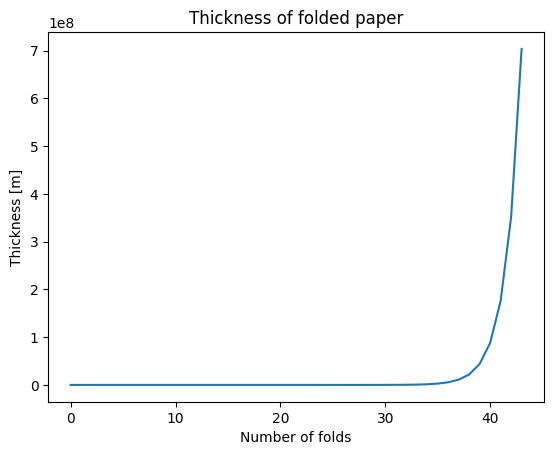

In [8]:
import matplotlib.pyplot as plt

THICKNESS = 0.00008
FOLDS = 43

# --- Guardar todos los valores en una lista ---
thickness_list = []
current = THICKNESS
thickness_list.append(current)  # valor inicial

for _ in range(FOLDS):
    current *= 2
    thickness_list.append(current)

# --- Graficar ---
plt.title("Thickness of folded paper")
plt.xlabel("Number of folds")
plt.ylabel("Thickness [m]")
plt.plot(thickness_list)   # la lista completa
plt.show()


**[Problema 7] Personalización de gráficos**

Personalicemos el gráfico para que sea más fácil de ver. Cree al menos tres gráficos personalizados. Por ejemplo, el color de la línea se puede cambiar a rojo reescribiéndolo como sigue.

《código de muestra》

# Display a red line graph.
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness [m]")
plt.plot(List name, color='red')
plt.show()
Consulte la documentación oficial de Matplotlib para ver qué puede hacer.

matplotlib.pyplot.plot – Documentación de Matplotlib

« Ejemplo de personalización »

Haz que la línea tenga un color distinto a azul y rojo.
Haz la línea más gruesa.
Haz la línea punteada.
Cambiar el tamaño de fuente del valor.
《código de muestra》

# Display the axis value in large size.
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.tick_params(labelsize=20) # Make settings related to axis values
plt.plot(List name)
plt.show()
Esto plt.tick_params ()se explica en la siguiente página.

matplotlib.pyplot.tick_params – Documentación de Matplotlib

Explore diferentes métodos de personalización para crear gráficos fáciles de leer.

Por favor envíe la respuesta a esta tarea de una manera fácil de leer.

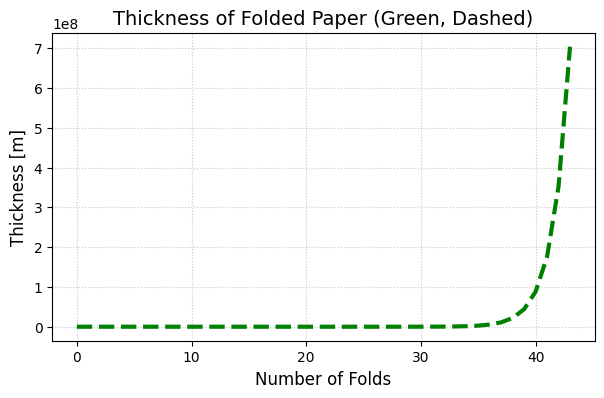

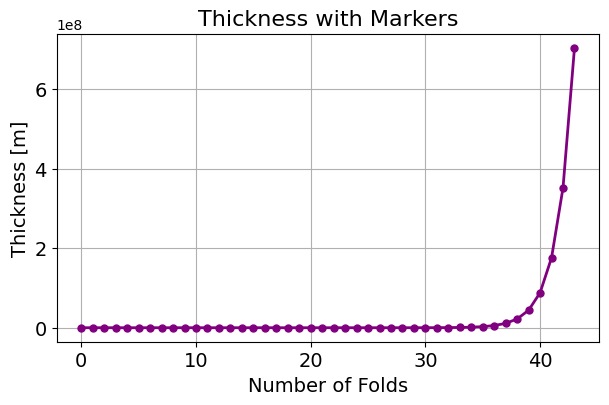

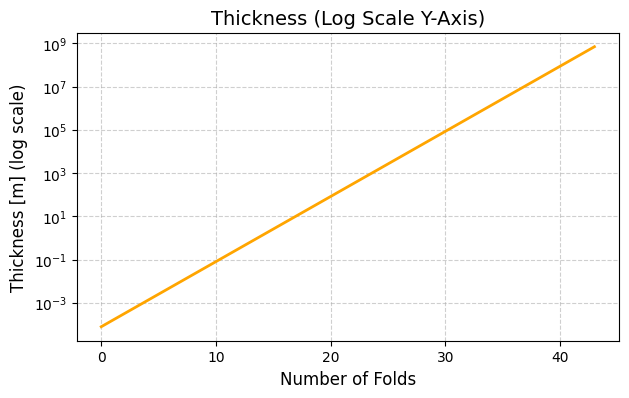

In [10]:
import matplotlib.pyplot as plt

# --- Datos (mismo cálculo de antes) ---
THICKNESS = 0.00008
FOLDS = 43
thickness_list = [THICKNESS]
current = THICKNESS
for _ in range(FOLDS):
    current *= 2
    thickness_list.append(current)

# ==============================
# 1️⃣ Línea verde, más gruesa y punteada
# ==============================
plt.figure(figsize=(7,4))
plt.title("Thickness of Folded Paper (Green, Dashed)", fontsize=14)
plt.xlabel("Number of Folds", fontsize=12)
plt.ylabel("Thickness [m]", fontsize=12)
plt.plot(thickness_list, color="green", linewidth=3, linestyle="--")  # verde, grueso, punteado
plt.grid(True, linestyle=":", alpha=0.7)  # rejilla sutil
plt.show()

# ==============================
# 2️⃣ Color púrpura, puntos circulares y fuente grande en ejes
# ==============================
plt.figure(figsize=(7,4))
plt.title("Thickness with Markers", fontsize=16)
plt.xlabel("Number of Folds", fontsize=14)
plt.ylabel("Thickness [m]", fontsize=14)
plt.tick_params(labelsize=14)                     # agrandar números de los ejes
plt.plot(thickness_list, color="purple", marker="o", markersize=5, linewidth=2)
plt.grid(True)
plt.show()

# ==============================
# 3️⃣ Escala logarítmica para ver todo el rango
# ==============================
plt.figure(figsize=(7,4))
plt.title("Thickness (Log Scale Y-Axis)", fontsize=14)
plt.xlabel("Number of Folds", fontsize=12)
plt.ylabel("Thickness [m] (log scale)", fontsize=12)
plt.plot(thickness_list, color="orange", linewidth=2)
plt.yscale("log")                                # eje Y en log10
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()
